# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:185%; text-align:center; border-radius:10px 10px;">Support Vector Machines Classification Project: Fraud in Wine</p>


<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">Introduction


### [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

### Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.

**Our overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*
</div>

## Explore the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9.8   Legit  red  
3      9.8   Legit  red  
4      9.4   Legit  red

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


**What are the unique variables in the target column we are trying to predict (quality)?**

In [5]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

**Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

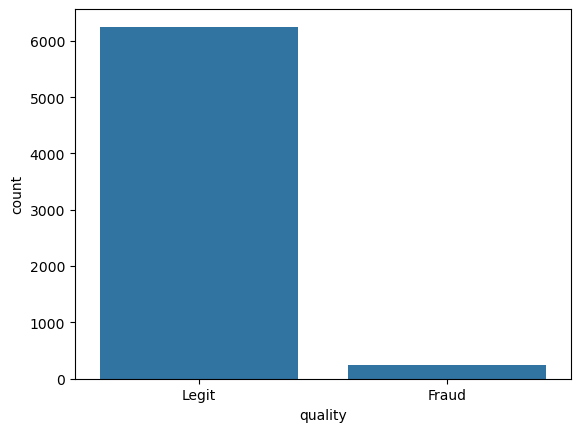

In [6]:
# To check the target column if it is balanced

sns.countplot(df, x="quality");

**Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

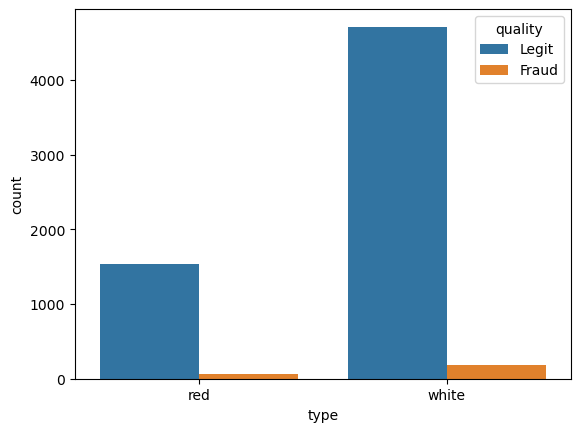

In [7]:
sns.countplot(df, x="type", hue="quality");

**How many Legit and Fraud categories have quality column and what is their percentage?**

In [8]:
# Count the number of each category in the quality column
quality_counts = df['quality'].value_counts()
quality_counts 

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

In [9]:
# Calculate the percentage of each category
quality_percentages = (quality_counts / len(df)) * 100
quality_percentages

quality
Legit    96.213637
Fraud     3.786363
Name: count, dtype: float64

In [10]:
#  Or we could print the results...
print("Count of each category in the quality column:")
print(quality_counts)
print("\nPercentage of each category in the quality column:")
print(quality_percentages)

Count of each category in the quality column:
quality
Legit    6251
Fraud     246
Name: count, dtype: int64

Percentage of each category in the quality column:
quality
Legit    96.213637
Fraud     3.786363
Name: count, dtype: float64


**What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [11]:
# Fraud in Red Wine

reds = df[df["type"]=='red']

print("Percentage of fraud in Red Wines:")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [12]:
# to see the number of Fraud in Red
len(reds[reds['quality']=='Fraud'])

63

In [13]:
# Fraud in White Wine

whites = df[df["type"]=='white']

print("Percentage of fraud in White Wines:")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

Percentage of fraud in White Wines:
3.7362188648427925


In [14]:
# to see the number of Fraud in White

len(whites[whites['quality']=='Fraud'])

183

In [15]:
# Alternative way to display the percentage ...
print(f"Percentage of red wines that are Fraud: {100* (len(reds[reds['quality']=='Fraud'])/len(reds)):.2f}%")
print(f"Percentage of white wines that are Fraud: {100* (len(whites[whites['quality']=='Fraud'])/len(whites)):.2f}%")

Percentage of red wines that are Fraud: 3.94%
Percentage of white wines that are Fraud: 3.74%


<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 
The percentage of fraudulent wine in White and Red type is very close: 3.94% in Red and 3.74% in White. The rest is real wines in both types.
</span>

**Calculate the correlation between the various features and the "quality" column. We can map the column to 0 and 1 instead of a string.**

In [16]:
# creat a new column for Fraud=1 (Legit=0)
df["Fraud"] = df["quality"].map({"Legit":0, "Fraud":1})

In [17]:
# Let's look at the new column
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  Fraud  
0      9.4   Legit  red      0  
1      9.8   Legit  red      0  
2      9.8   Legit  red      0  
3      9.8   Legit  red      0  
4      9.4   Legit  red      0

In [18]:
df.corr(numeric_only=True)["Fraud"]

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**Create a bar plot of the correlation values to Fraud wine.**

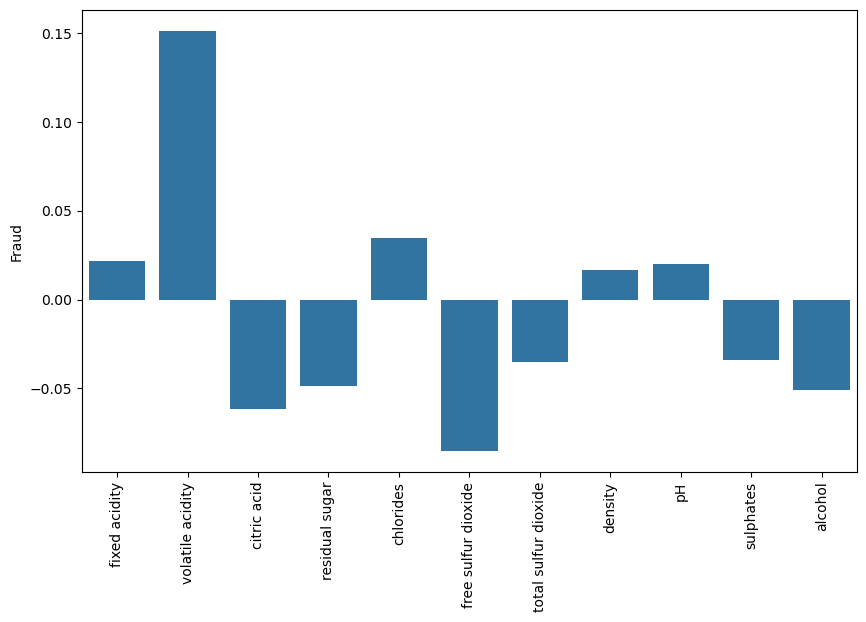

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(df.corr(numeric_only=True)["Fraud"][:-1]) # remove the Fraud column

# rotate x-axis labels
plt.xticks(rotation=90);  

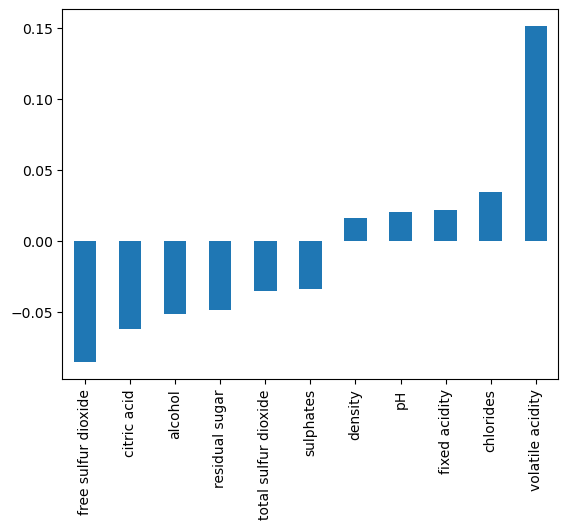

In [20]:
# to sort it ... 

df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar');

<div class="alert alert-warning alert-info">
    
#### <span style=" color:#bf2e98">Insight:
It seems that among the features **volatile acidity** and **free sulfur dioxide** have a relatively strong correlation with the dependent variable. However, one has a positive, and the other one has a negative correlation.
</span>

**Create a clustermap with seaborn to explore the relationships between variables.**

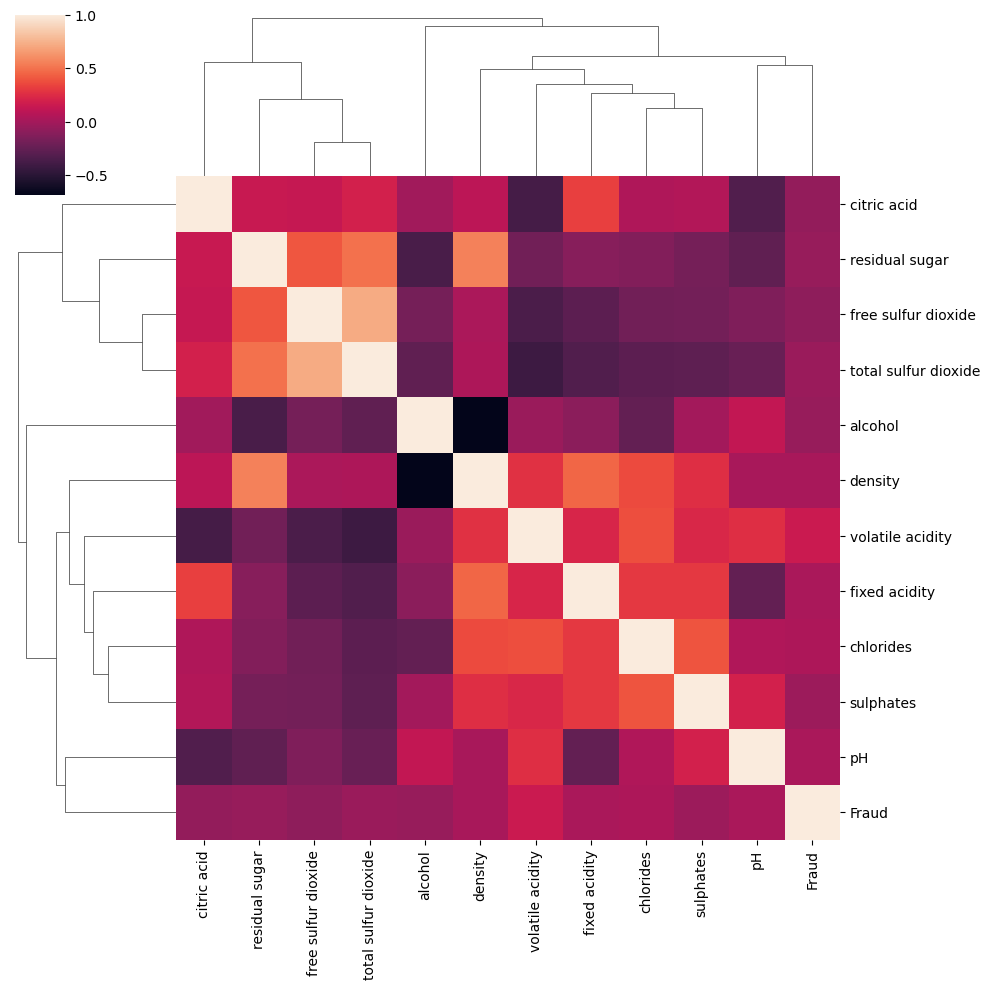

In [21]:
sns.clustermap(df.corr(numeric_only=True));

**Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [22]:
# get dummies for type column
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [23]:
# Before splitting the data as X and y, drop also the column Fraud that we created above using map
df = df.drop('Fraud',axis=1)

In [24]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality   type  
0      9.4   Legit  False  
1      9.8   Legit  False  
2      9.8   Legit  False  
3      9.8   Legit  False  
4      9.4   Legit  False

The **type** column looks boolean instead of numeric like 0 and 1. Let's check it and convert it to numeric.

In [25]:
# df.info() 

In [26]:
# Another way to see boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns
boolean_columns

Index(['type'], dtype='object')

In [27]:
# Convert it from boolean to numeric
df["type"] = df["type"].astype(int)

# 0 for red and 1 for white in new type column

In [28]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  type  
0      9.4   Legit     0  
1      9.8   Legit     0  
2      9.8   Legit     0  
3      9.8   Legit     0  
4      9.4   Legit     0

----
## Machine Learning Model: SVM-Classification

**Separate out the data into X features and y target label ("quality" column)**

In [29]:
X = df.drop('quality',axis=1)
y = df['quality']

**Perform a Train|Test split on the data, with a 10% test size. and a random state of 101**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101 )

**Scale the X train and X test data.**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
# scale X data 

# fit and transform for X_train
scaled_X_train = scaler.fit_transform(X_train) 

# just transform for X_test
scaled_X_test = scaler.transform(X_test)  

**Create an instance of a Support Vector Machine classifier. We already know that the classes are unbalanced. In an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [35]:
from sklearn.svm import SVC

In [36]:
# help(SVC)

"""
class_weight: dict or balanced, default=None
If not given, all classes are supposed to have weight one.
The "balanced" mode uses the values of y to automatically adjust
weights inversely proportional to class frequencies in the input data.
"""

'\nclass_weight: dict or balanced, default=None\nIf not given, all classes are supposed to have weight one.\nThe "balanced" mode uses the values of y to automatically adjust\nweights inversely proportional to class frequencies in the input data.\n'

In [37]:
# Since it is imbalanced data in terms of label column, we use class_weight="balanced"
svc = SVC(class_weight='balanced')

**Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# parameters

param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1],
             'gamma': ["scale", "auto"]}

In [40]:
# grid model  (svc with parameters)

grid = GridSearchCV(svc, param_grid)

In [41]:
# Fit the model (using training (scaled) X and y data)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [42]:
# see the best parameters for this model
grid.best_params_

{'C': 1, 'gamma': 'auto'}

For this model, our best parameters are C = 1 and gamma = auto. "1" is actually default value for C.

**Display the confusion matrix and classification report for the model.**

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
# After training the model now predict the rest 10% using the (scaled) X test data

grid_pred = grid.predict(scaled_X_test)

In [45]:
# Confusion Matrix  (y_true,y_pred)

confusion_matrix(y_test, grid_pred)  

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

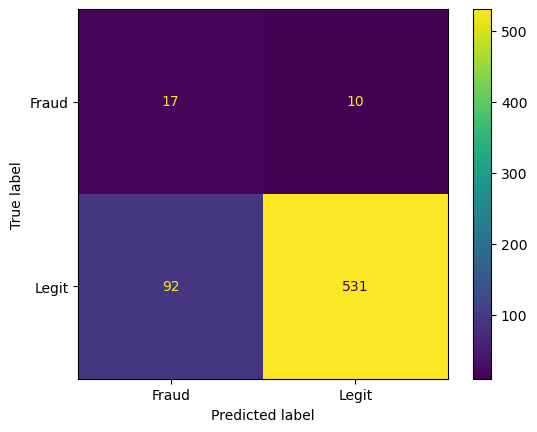

In [46]:
# Plot the matrix

from sklearn.metrics import ConfusionMatrixDisplay  
ConfusionMatrixDisplay.from_predictions(y_test, grid_pred);

In [47]:
# Classification Report

print(classification_report(y_test, grid_pred))

# to see the report like a table, use print()

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



<div class="alert alert-block alert-success">
    
### <span style=" color:red">Conclusion:

Since the label column has imbalanced data in terms of the Fraud category, the model could not perform well in predicting the fraudulent wine. Remember the categories in the quality column:

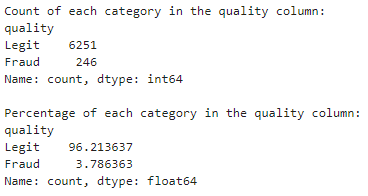

Keep in mind that we set the test size as 10%. When we compare the prediction of y labels with the y_true values, we see 102 (92 + 10) wrong predictions.  When we look at the true and predicted labels, the model predicts 92 real (Legit) wines as Fraud and 10 fraudulent wines as Legit. Therefore, especially the precision (0.16) and F1 (0.25) scores are low for the imbalanced Fraud class. On the other hand, the model seems good to predict in Legit class (F1: 0.91), that is, real wine. However, this conclusion might be misleading because we already have imbalanced data. It means that we have a small amount of Fraud samples and if the model calls most of the data "Legit", it will not fail much.

The reason why the model could not predict the Fraud class well might be that the independent variables are not good enough to explain the relationship. As a solution, we can try other classification models such as Logistic Regression, KNN, or Tree-based models. Then, compare the results with SVMs. If the results do not change much, it means that the problem is not the SVM Classification model, but the effectiveness of the features in explaining the dependent variable (quality). 
</span>